## 영어 텍스트 처리: nltk

In [14]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [15]:
example_string = """
... Muad'Dib learned rapidly because his first training was in how to learn.
... And the first lesson of all was the basic trust that he could learn.
... It's shocking to find how many people do not believe they can learn,
... and how many more believe learning to be difficult."""

In [16]:
# 문장 단위 분할
sent_tokenize(example_string)

["\nMuad'Dib learned rapidly because his first training was in how to learn.",
 'And the first lesson of all was the basic trust that he could learn.',
 "It's shocking to find how many people do not believe they can learn,\nand how many more believe learning to be difficult."]

In [17]:
# 단어 단위 분할
word_tokenize(example_string)[:5]

["Muad'Dib", 'learned', 'rapidly', 'because', 'his']

#### filtering stopwords

In [19]:
import nltk
nltk.download("stopwords")

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [20]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
list(stop_words)[:5]

['himself', 'am', 'so', 'once', 'other']

#### Stemming

In [21]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [22]:
stemmer = PorterStemmer()

In [23]:
string_for_stemming = """
... The crew of the USS Discovery discovered many discoveries.
... Discovering is what explorers do."""

In [24]:
words = word_tokenize(string_for_stemming)

In [25]:
stemmed_words = [stemmer.stem(word) for word in words]

In [26]:
stemmed_words[:5]

['the', 'crew', 'of', 'the', 'uss']

#### Pos Tagging

In [ ]:
nltk.pos_tag(stemmed_words)[:5]

In [ ]:
# 태그 목록 확인
#nltk.help.upenn_tagset()

#### Lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
string_for_lemmatizing = "The friends of DeSoto love scarves."
words = word_tokenize(string_for_lemmatizing)
lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
lemmatized_words

## 한국어 텍스트 처리: konlpy

#### 데이터 준비

In [30]:
from konlpy.corpus import kolaw
c = kolaw.open('constitution.txt').read()
print(c[:40])

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로


#### 형태소 분석기

In [31]:
from konlpy.tag import *

hannanum = Hannanum()
kkma = Kkma()
komoran = Komoran()
#mecab = Mecab()
#okt = Okt()

#### 명사 추출

In [32]:
print(hannanum.nouns(c[:40]))
print(kkma.nouns(c[:40]))
print(komoran.nouns(c[:40]))

['대한민국헌법', '유구', '역사', '전통', '빛', '우리', '대한국민', '3·1운동']
['대한', '대한민국', '대한민국헌법', '민국', '헌법', '유구', '역사', '전통', '우리', '국민', '3', '1', '1운동', '운동']
['대한민국', '헌법', '역사', '전통', '국민', '운동']


#### 형태소 추출

In [34]:
print(hannanum.morphs(c[:40]))
print(kkma.morphs(c[:40]))

['대한민국헌법', '유구', '하', 'ㄴ', '역사', '와', '전통', '에', '빛', '나는', '우리', '대한국민', '은', '3·1운동', '으로']
['대한민국', '헌법', '유구', '하', 'ㄴ', '역사', '와', '전통', '에', '빛나', '는', '우리', '대하', 'ㄴ', '국민', '은', '3', '·', '1', '운동', '으로']


#### 품사태깅

In [35]:
print(hannanum.pos(c[:40]))
print(kkma.pos(c[:40]))

[('대한민국헌법', 'N'), ('유구', 'N'), ('하', 'X'), ('ㄴ', 'E'), ('역사', 'N'), ('와', 'J'), ('전통', 'N'), ('에', 'J'), ('빛', 'N'), ('나는', 'J'), ('우리', 'N'), ('대한국민', 'N'), ('은', 'J'), ('3·1운동', 'N'), ('으로', 'J')]
[('대한민국', 'NNG'), ('헌법', 'NNG'), ('유구', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('역사', 'NNG'), ('와', 'JC'), ('전통', 'NNG'), ('에', 'JKM'), ('빛나', 'VV'), ('는', 'ETD'), ('우리', 'NNM'), ('대하', 'VV'), ('ㄴ', 'ETD'), ('국민', 'NNG'), ('은', 'JX'), ('3', 'NR'), ('·', 'SP'), ('1', 'NR'), ('운동', 'NNG'), ('으로', 'JKM')]


#### 특수문자 제거

In [36]:
import re
def clean_text(text):
    """ 한글, 영문, 숫자만 남기고 제거한다. :param text: :return: """
    text = text.replace(".", " ").strip()
    text = text.replace("·", " ").strip()
    pattern = '[^ ㄱ-ㅣ가-힣|0-9|a-zA-Z]+'
    text = re.sub(pattern=pattern, repl='', string=text)
    return text

In [37]:
clean_text("하하하 @@@@ ㅋㅋㅋ !!")

'하하하  ㅋㅋㅋ '

### Term-Document Matrix

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = ['This is the first document.',
          'This document is the second document.',
          'And this is the third one.',
          'Is this the first document?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print(X.toarray()) # ndarray

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


c:\Users\whgur\Desktop\workspace\ADP\adp\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


#### TF-IDF

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = ['This is the first document.',
         'This document is the second document.',
         'And this is the third one.',
         'Is this the first document?']
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print(X.toarray())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
[[0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]
 [0.         0.6876236  0.         0.28108867 0.         0.53864762
  0.28108867 0.         0.28108867]
 [0.51184851 0.         0.         0.26710379 0.51184851 0.
  0.26710379 0.51184851 0.26710379]
 [0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]]


## 토픽모델링
#### 데이터 불러오기

In [40]:
import pandas as pd
import gensim
from sklearn.feature_extraction.text import CountVectorizer
 
documents = pd.read_csv(r'C:\Users\whgur\Desktop\workspace\ADP\data\abcnews-date-text.csv',
                        error_bad_lines=False, nrows = 1000)
 
documents.head()

c:\Users\whgur\Desktop\workspace\ADP\adp\lib\site-packages\IPython\core\interactiveshell.py:3553: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


#### 데이터 정리

In [41]:
# Use CountVectorizor to find three letter tokens, remove stop_words, 
# remove tokens that don't appear in at least 20 documents,
# remove tokens that appear in more than 20% of the documents
vect = CountVectorizer(min_df=20, max_df=0.2, stop_words='english', 
                       token_pattern='(?u)\\b\\w\\w\\w+\\b')

# Fit and transform
X = vect.fit_transform(documents.headline_text)

# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)

#### LDA Model 생성

In [42]:
# Mapping from word IDs to words (To be used in LdaModel's id2word parameter)
id_map = dict((v, k) for k, v in vect.vocabulary_.items())
 
# Use the gensim.models.ldamodel.LdaModel constructor to estimate 
# LDA model parameters on the corpus, and save to the variable `ldamodel`
ldamodel = gensim.models.LdaMulticore(corpus=corpus, id2word=id_map, passes=2, num_topics=5, workers=2)

#### 토픽별 단어 구성확인

In [43]:
for idx, topic in ldamodel.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

Topic: 0 
Words: 0.424*"police" + 0.301*"new" + 0.121*"man" + 0.088*"council" + 0.045*"govt" + 0.004*"rain" + 0.004*"court" + 0.004*"iraq" + 0.004*"nsw" + 0.004*"war"


Topic: 1 
Words: 0.809*"rain" + 0.086*"man" + 0.046*"new" + 0.009*"police" + 0.009*"council" + 0.009*"iraq" + 0.008*"govt" + 0.008*"court" + 0.008*"nsw" + 0.008*"war"


Topic: 2 
Words: 0.402*"man" + 0.277*"iraq" + 0.254*"court" + 0.023*"police" + 0.011*"new" + 0.009*"war" + 0.008*"rain" + 0.008*"govt" + 0.003*"council" + 0.003*"nsw"


Topic: 3 
Words: 0.417*"war" + 0.378*"govt" + 0.088*"court" + 0.030*"man" + 0.027*"iraq" + 0.022*"rain" + 0.014*"nsw" + 0.013*"new" + 0.006*"police" + 0.005*"council"


Topic: 4 
Words: 0.419*"nsw" + 0.366*"council" + 0.077*"iraq" + 0.048*"new" + 0.025*"man" + 0.022*"rain" + 0.014*"govt" + 0.013*"police" + 0.013*"court" + 0.005*"war"




#### 토픽 분포 확인

In [44]:
def topic_distribution(string_input):
    string_input = [string_input]
    # Fit and transform
    X = vect.transform(string_input)
 
    # Convert sparse matrix to gensim corpus.
    corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)

    output = list(ldamodel[corpus])[0] 
    return output

# 토픽의 비율: 0번 토픽 - 0.2, 1번 토픽 - 0.2, ...
topic_distribution(documents['headline_text'].iloc[0])

[(0, 0.2), (1, 0.2), (2, 0.2), (3, 0.2), (4, 0.2)]

## Word Cloud

In [45]:
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [46]:
## 데이터 프레임 생성
df = pd.read_csv(r"C:\Users\whgur\Desktop\workspace\ADP\data\fruit_vegetable.csv", encoding = "utf-8")

## 생성된 데이터 프레임을 딕셔너리로 변환
wc = df.set_index("title").to_dict()["count"]

In [47]:
wordCloud = WordCloud(
font_path = "malgun", # 폰트 지정
width = 400, # 워드 클라우드의 너비 지정
height = 400, # 워드클라우드의 높이 지정
max_font_size=100, # 가장 빈도수가 높은 단어의 폰트 사이즈 지정
background_color = 'white' # 배경색 지정
).generate_from_frequencies(wc) # 워드 클라우드 빈도수 지정

(-0.5, 399.5, 399.5, -0.5)

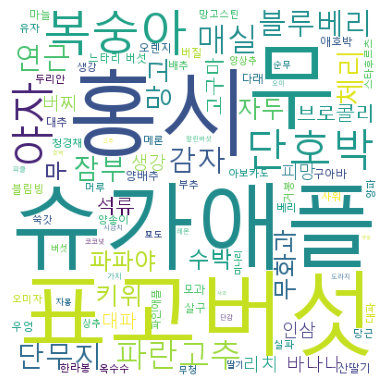

In [48]:
plt.figure()  
plt.imshow(wordCloud)
plt.axis('off')

In [ ]:
img = Image.open('D:/Python_apply/원.png') #이미지 오픈
imgArray = np.array(img) # 이미지의 각 셀을 수치로 변환

wordCloud = WordCloud(
    font_path = "malgun",
    width = 400,
    height = 400,
    max_font_size=100,
    background_color = 'white',
    mask = imgArray    # 사용하고자 하는 이미지 사용
    ).generate_from_frequencies(wc)

plt.figure()
plt.imshow(wordCloud)
plt.axis('off')

mask 이미지를 지정해주면 mask 형태와 같은 wordcloud를 만들 수 있다.

## Word2Vec

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [51]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x20b910c6488>)

In [54]:
train_data = pd.read_table('ratings.txt')
train_data = train_data[:1000]

In [55]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [56]:
# 정규 표현식을 통한 한글 외 문자 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

c:\Users\whgur\Desktop\workspace\ADP\adp\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


* 불용어 제거

In [57]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()

tokenized_data = []
for sentence in train_data['document']:
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

In [59]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data, vector_size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [60]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(383, 100)

In [ ]:
print(model.wv.most_similar("최민식"))

In [ ]:
print(model.wv.most_similar("히어로"))